In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from icecream import ic

In [67]:
# import data from ../data/data-agg.csv 
data = pd.read_csv('../data/data-agg.csv')
# "heads_heads","tails_heads","N_start_heads_up","N_start_tails_up","person","coin"
# create a new column that is the sum of N_start_heads_up and N_start_tails_up
data['N_throws'] = data['N_start_heads_up'] + data['N_start_tails_up']
data['tails_tails'] = data['N_start_tails_up'] - data['tails_heads']
data['heads_tails'] = data['N_start_heads_up'] - data['heads_heads']
# group by person and coin, then sum
p_grouped = data.groupby('person')
ic(p_grouped.sum(numeric_only=True).head())
c_grouped = data.groupby('coin')
ic(c_grouped.sum(numeric_only=True).head())

ic| p_grouped.sum(numeric_only=True).

head():               heads_heads  tails_heads  N_start_heads_up  N_start_tails_up  \
                                             person                                                                       
                                             AaronLob             1937         1787              3735              3665   
                                             AdrianKarami          880          828              1703              1697   
                                             AndreeaZetea         1129         1134              2268              2209   
                                             AntonZoubek          2587         2463              5059              4945   
                                             ArneJohn              995          982              1976              1924   
                                             
                                                           N_throws  tails_tails  heads_tails  
                                  

,heads_heads,tails_heads,N_start_heads_up,N_start_tails_up,N_throws,tails_tails,heads_tails
coin,,,,,,,
0.01GBP,235,263,497,503,1000,240,262
0.02EUR,78,80,157,143,300,63,79
0.05EUR,1950,1871,3771,3743,7514,1872,1821
0.05NZD,495,489,984,1027,2011,538,489
0.10EUR,2281,2234,4507,4658,9165,2424,2226


In [68]:
p_grouped = data.set_index('person', inplace=False).groupby('person')
ic(p_grouped['N_throws'].sum().head())
c_grouped = data.set_index('coin', inplace=False).groupby('coin')
ic(c_grouped['N_throws'].sum().head())

n_people = p_grouped['N_throws'].sum().count()
n_coin = c_grouped['N_throws'].sum().count()
ic(n_coin)
ic(n_people)


ic| p_grouped['N_throws'].sum().head(): person
                                        AaronLob         

7400
                                        AdrianKarami     3400
                                        AndreeaZetea     4477
                                        AntonZoubek     10004
                                        ArneJohn         3900
                                        Name: N_throws, dtype: int64
ic| c_grouped['N_throws'].sum().head(): coin
                                        0.01GBP    1000
                                        0.02EUR     300
                                        0.05EUR    7514
                                        0.05NZD    2011
                                        0.10EUR    9165
                                        Name: N_throws, dtype: int64
ic| n_coin: np.int64(44)
ic| n_people: np.int64(48)


np.int64(48)

Text(0.5, 1.0, 'Histogram of c_N_throws')

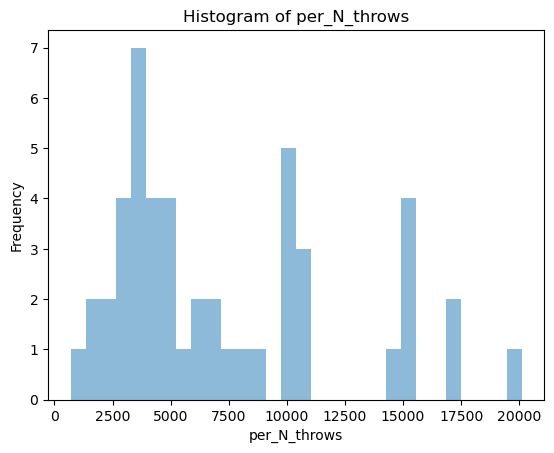

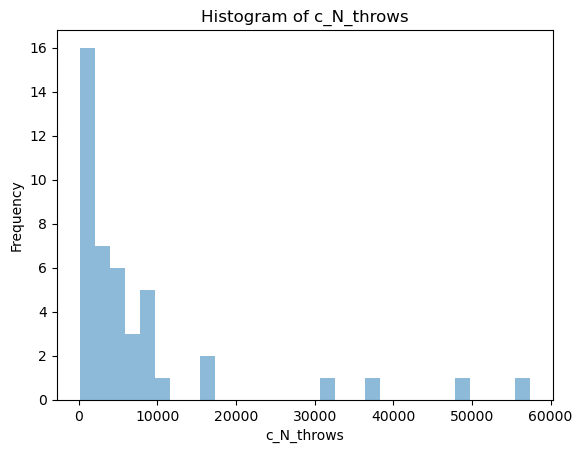

In [69]:
per_N_throws = p_grouped['N_throws'].sum()

plt.figure()
plt.hist(per_N_throws, bins=30, alpha=0.5)
plt.xlabel('per_N_throws')
plt.ylabel('Frequency')
plt.title('Histogram of per_N_throws')

c_N_throws = c_grouped['N_throws'].sum()
plt.figure()
plt.hist(c_N_throws, bins=30, alpha=0.5)
plt.xlabel('c_N_throws')
plt.ylabel('Frequency')
plt.title('Histogram of c_N_throws')

Text(0.5, 1.0, 'Person success rate with error bars')

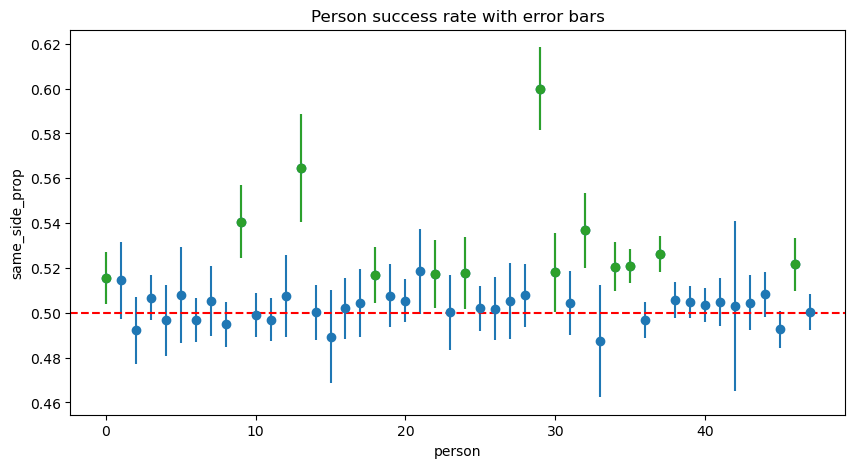

In [93]:
def prop_to_plot( groups ):
    data_g = data.groupby(groups).sum(numeric_only=True)
    h_h, t_t, N_h, N_t = data_g['heads_heads'], data_g['tails_tails'], data_g['N_start_heads_up'], data_g['N_start_tails_up']
    prop = (h_h / N_h + t_t / N_t) / 2
    prop_err = np.sqrt( prop * (1 - prop) / (N_h + N_t) )
    x_axis = np.arange(prop.size)
    plt.errorbar( x_axis, prop, yerr=2*prop_err, fmt='o')
    outliers = np.abs( 0.5 - prop ) > 2*prop_err
    plt.errorbar( x_axis[outliers], prop[outliers], color='tab:green', fmt='o', yerr=2*prop_err[outliers])
    plt.axhline(y=0.5, color='r', linestyle='--')
    return

plt.figure(figsize=(10,5))
prop_to_plot('person')
plt.xlabel('person')
plt.ylabel('same_side_prop')
plt.title('Person success rate with error bars')


Text(0.5, 1.0, 'Coin success rate with error bars')

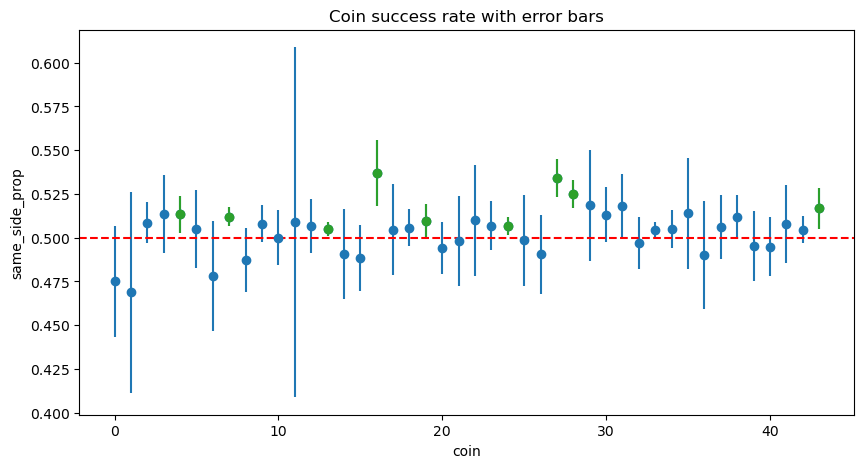

In [97]:
figure = plt.figure(figsize=(10,5))
prop_to_plot( ['coin'] )
plt.xlabel('coin')
plt.ylabel('same_side_prop')
plt.title('Coin success rate with error bars')

Text(0.5, 1.0, 'Person-coin success rate with error bars')

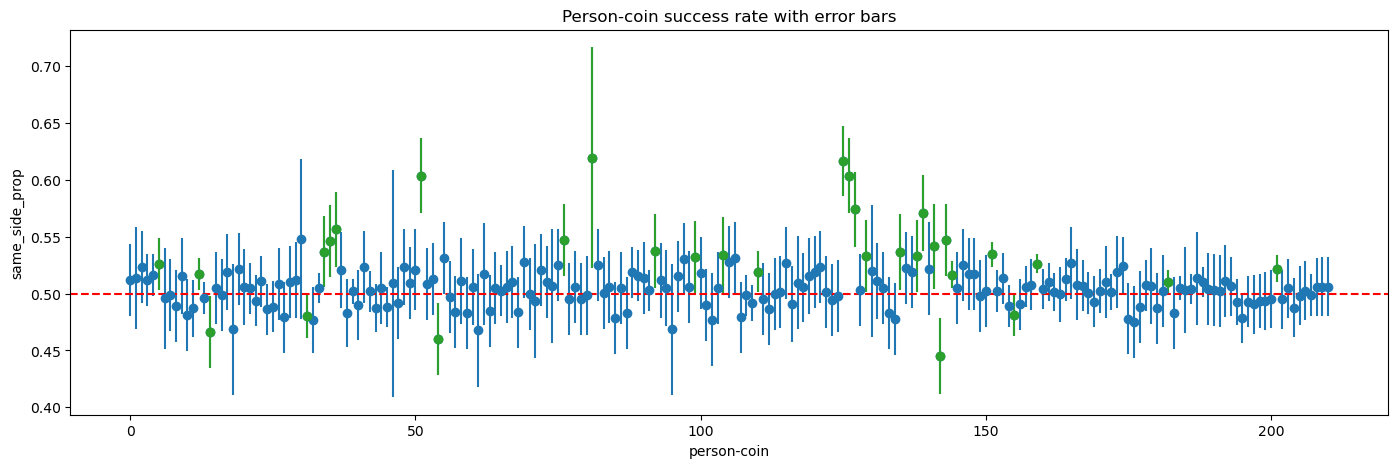

In [95]:

plt.figure(figsize=(17, 5))
prop_to_plot( ['person','coin'] )
plt.xlabel('person-coin')
plt.ylabel('same_side_prop')
plt.title('Person-coin success rate with error bars')


ic| avg_slope/count: np.float64(-0.00015313157534512707)


np.float64(-0.00015313157534512707)

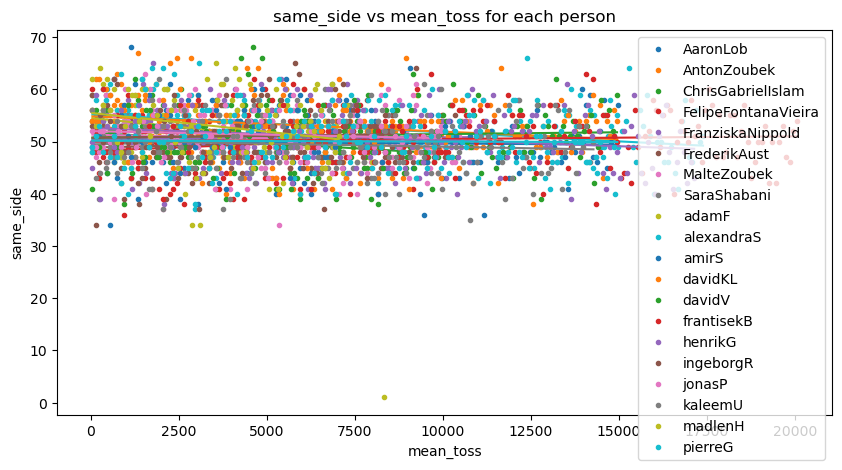

In [122]:
data = pd.read_csv('../data/full-coin-data/coin data/analyses/df-time-agg.csv')
p_grouped = data.set_index('person', inplace=False).groupby('person')
# for each person, plot 'same_side' as a function of 'mean_toss'
plt.figure(figsize=(10,5))
count = 0
avg_slope = 0
for name, group in p_grouped:
    if count < 50:
        # only plot if last element of 'mean_toss' exceeds 10000
        if group['mean_toss'].iloc[-1] > 7000:
            # fit a line to the data
            fit = np.polyfit(group['mean_toss'], group['same_side'], 1)
            fit_fn = np.poly1d(fit)
            l = plt.plot(group['mean_toss'], group['same_side'], 'o', label=name, markersize=3)
            col = l[0].get_color()
            plt.plot(group['mean_toss'], fit_fn(group['mean_toss']), color=col)
            avg_slope += fit[0]

            count += 1
plt.xlabel('mean_toss')
plt.ylabel('same_side')
plt.legend()
plt.title('same_side vs mean_toss for each person')
ic(avg_slope/count)


